### DataSet--Heart_Disease.csv.
This DataSet is about the Key Indicators of Heart Disease
It was taken from the 2020 annual CDC survey data of 400k adults related to their health status.
Here we are going to analyse factors that affect Heart Disease.

Variable Descriptions
- HeartDisease--Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

- BMI--Body Mass Index (BMI)

- Smoking--Have you smoked at least 100 cigarettes in your entire life? 

- AlcoholDrinking--Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

- Stroke--(Ever told) (you had) a stroke?

- PhysicalHealth--Includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)

- MentalHealth--For how many days during the past 30 days was your mental health not good? (0-30 days)

- DiffWalking--Do you have serious difficulty walking or climbing stairs?

- Sex--Are you male or female?

- AgeCategory--Fourteen-level age category

- Race--Imputed race/ethnicity value

- Diabetic--(Ever told) (you had) diabetes?

- PhysicalActivity--Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

- GenHealth--Would you say that in general your health is...

- SleepTime--On average, how many hours of sleep do you get in a 24-hour period?

- Asthma--(Ever told) (you had) asthma?

- KidneyDisease  Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

- SkinCancer--(Ever told) (you had) skin cancer?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Heart_Disease.csv')
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [5]:
# Checking for any null values in the DataSet
df.isnull().any().sum()

0

<b>Converting categorical Values into numerical values to help with the analysis</b>

In [6]:
df.Diabetic.unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [7]:
# Diabetic: diabetic=1, not diabetic=0,No, borderline diabetes-0.5,Yes (during pregnancy)-0.5

def Diabetictonum(x):
    if x == "No":
        return 0
    elif x=="Yes":
        return 1
    else:
        return 0.5

df.loc[:,"Diabetic"]=df["Diabetic"].apply(Diabetictonum)

In [8]:
# yes values to 1 and no to 0 for the whole dataframe
df.replace(to_replace="Yes", value=1,inplace=True)

df.replace(to_replace="No", value=0,inplace=True)

In [9]:
#BMI: Below 18.5 Underweight, 18.5—24.9 Healthy, 25.0—29.9 Overweight, 30.0 and Above Obese

def BMItonum(x):
    if x <18.5:
        return 1
    elif x<25:
        return 2
    elif x<30:
        return 3
    else:
        return 4

df.loc[:,"BMIBucket"]=df["BMI"].apply(BMItonum)

In [10]:
# dropping BMI because I am using BMIBuckets
df.drop(['BMI'],axis=1,inplace=True)

In [11]:
df.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [12]:
#GenHealth: 'Excellent'=4,'Very good'=3,  Good'=2,'Fair'=1,  'Poor'=0
def GenHealthtonum(x):
    if x == 'Excellent':
        return 4
    elif x=='Very good':
        return 3
    elif x=='Good':
        return 2
    elif x=='Fair':
        return 1
    else:
        return 0

df.loc[:,"GenHealth"]=df["GenHealth"].apply(GenHealthtonum)

In [13]:
df.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [14]:
# Widening age-category buckets 
      
def AgeCategorytonum(x):
    if x == ('18-24' or '25-29' or '30-34'or '35-39'):
        return 1
    elif x==('40-44' or '45-49' or '50-54' or '55-59'):
        return 2
    elif x==('60-64'or '65-69' or '70-74' or '75-79'):
        return 3
    else:
        return 4
df.loc[:,"AgeCategory"]=df["AgeCategory"].apply(AgeCategorytonum)

In [15]:
df.Sex.unique()

array(['Female', 'Male'], dtype=object)

In [16]:
#Sex: Male=0, Female=1
def Sextonum(x):
    if x == "Male":
        return 0
    else:
        return 1

df.loc[:,"Sex"]=df["Sex"].apply(Sextonum)

In [17]:
df.groupby("Sex").count()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMIBucket
Sex,,,,,,,,,,,,,,,,,
0,151990,151990,151990,151990,151990,151990,151990,151990,151990,151990,151990,151990,151990,151990,151990,151990,151990
1,167805,167805,167805,167805,167805,167805,167805,167805,167805,167805,167805,167805,167805,167805,167805,167805,167805


In [18]:
# We are creating a new Column "PrEexistingConditions" to give us a comprehensive view of the number of health risks faced by an individual. 
# Stroke + DiffWalking + Diabetic + Asthma+ KidneyDisease + SkinCancer
df.loc[:, "PreExistingConditions"]= df.Stroke + df.DiffWalking + df.Diabetic +df.Asthma+ df.KidneyDisease +df.SkinCancer
     

In [19]:
# Dropping some columns because they are already included in PreExistingConditions
df.drop(["Stroke","DiffWalking",'Diabetic','Asthma', 'KidneyDisease', 'SkinCancer'],axis=1,inplace=True)

In [20]:
# Dropping 'PhysicalHealth', 'MentalHealth' because i am not using these in my analysis
df.drop(['PhysicalHealth','MentalHealth',],axis=1,inplace=True)

In [21]:
# Creating dummy columns for Race.
df = pd.get_dummies(df, columns=["Race"])


In [22]:
df

,HeartDisease,Smoking,AlcoholDrinking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,BMIBucket,PreExistingConditions,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,1,0,1,4,1,3,5.0,1,3.0,0,0,0,0,0,1
1,0,0,0,1,4,1,3,7.0,2,1.0,0,0,0,0,0,1
2,0,1,0,0,4,1,1,8.0,3,2.0,0,0,0,0,0,1
3,0,0,0,1,4,0,2,6.0,2,1.0,0,0,0,0,0,1
4,0,0,0,1,2,1,3,8.0,2,1.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,0,3,0,1,6.0,3,3.0,0,0,0,1,0,0
319791,0,1,0,0,4,1,3,5.0,3,1.0,0,0,0,1,0,0
319792,0,0,0,1,4,1,2,6.0,2,0.0,0,0,0,1,0,0
319793,0,0,0,1,4,0,2,12.0,4,0.0,0,0,0,1,0,0


#### Data Cleaning End

####  LogisticRegression, a supervided Machine Learning method to study the dataset.
We will use Machine Learning to predict whether a person has HeartDisease or is at a risk of having a HeartDisease using the feature values of 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke','PhysicalHealth', 'MentalHealth', 'Sex', 'AgeCategory', 'Race','PhysicalActivity', 'GenHealth', 'SleepTime', 'BMIBucket','PreExistingConditions'.
Since my data set does not contain continuous values i have used classification Methods for my analysis.

In [23]:
print(df.keys())

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'BMIBucket',
       'PreExistingConditions', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White'],
      dtype='object')


In [24]:
df.head(2)

,HeartDisease,Smoking,AlcoholDrinking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,BMIBucket,PreExistingConditions,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,1,0,1,4,1,3,5.0,1,3.0,0,0,0,0,0,1
1,0,0,0,1,4,1,3,7.0,2,1.0,0,0,0,0,0,1


##### Arrange data into features matrix and target vector

In [25]:
# creating Feature Matrix 
X = df.iloc[:, 1:]
X.head()

,Smoking,AlcoholDrinking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,BMIBucket,PreExistingConditions,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,1,0,1,4,1,3,5.0,1,3.0,0,0,0,0,0,1
1,0,0,1,4,1,3,7.0,2,1.0,0,0,0,0,0,1
2,1,0,0,4,1,1,8.0,3,2.0,0,0,0,0,0,1
3,0,0,1,4,0,2,6.0,2,1.0,0,0,0,0,0,1
4,0,0,1,2,1,3,8.0,2,1.0,0,0,0,0,0,1


In [26]:
#Creating  Target vector
y = df.iloc[:,0]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64

In [27]:
#Choose model: LogisticRegression
from sklearn.linear_model import LogisticRegression
# Set model hyperparameters
model = LogisticRegression(solver='liblinear')
#Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Fit the model 
model.fit(X_train, y_train)

# Predict unknown data
y_test_pred = model.predict(X_test)
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58495
           1       0.53      0.07      0.13      5464

    accuracy                           0.92     63959
   macro avg       0.72      0.53      0.54     63959
weighted avg       0.89      0.92      0.88     63959



<b> Interpreting Logistic Regression Coefficients <b/>

In [28]:
# Putting logistic regression coefficients into a dataframe

logreg = LogisticRegression(max_iter=200)
logreg.fit(X, y)
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
PreExistingConditions,0.571669
AgeCategory,0.457778
Smoking,0.372807
SleepTime,0.035930
BMIBucket,-0.035913
PhysicalActivity,-0.060090
Race_White,-0.183022
Race_American Indian/Alaskan Native,-0.330996
Race_Other,-0.398247
AlcoholDrinking,-0.454855


In [29]:
#Converting log odd coefficients to regular odds by exponentiating

odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
PreExistingConditions,1.771221
AgeCategory,1.580558
Smoking,1.451803
SleepTime,1.036584
BMIBucket,0.964725
PhysicalActivity,0.941679
Race_White,0.832750
Race_American Indian/Alaskan Native,0.718208
Race_Other,0.671496
AlcoholDrinking,0.634540


Based on the Logistical Regression analysis, the top 5 factors affecting HeartDisease are PreExistingConditions,AgeCategory,Smoking,SleepTime and BMIBucket. As we can see PreExistingConditions is at the top.  Each additional pre-existing condition increases the odds of having a HeartDisease by 1.77. We analyse each of these factors below. 

#### Exploratory Analysis

In [30]:
# Mean of Number of people in the Dataset who have HeartDisease vs Dont have HeartDisease
df['HeartDisease'].mean()

0.08559545959130067

8.56% people have HeartDisease in the given Dataset

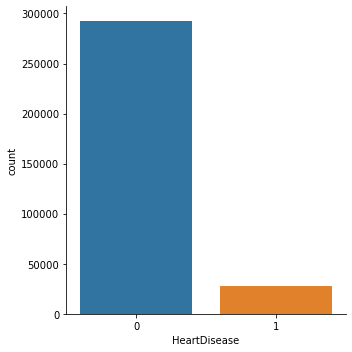

In [31]:
#Visual representation of Number of people in the Dataset who have HeartDisease vs Dont have HeartDisease
sns.catplot(x='HeartDisease', data=df, kind='count')

### PreExistingConditions and HeartDisease
PreExistingConditions=Smoking + AlcoholDrinking + Stroke + DiffWalking + Diabetic + Asthma+ KidneyDisease + SkinCancer

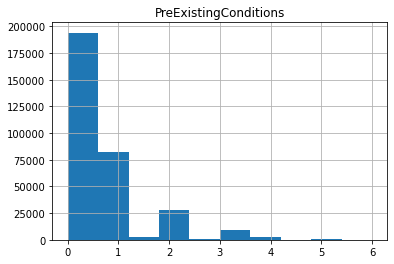

In [32]:
# PreExistingConditions Distribution
df.hist('PreExistingConditions')
plt.show()

In [33]:
# Mean of PreExistingConditions of people with HeartDisease
df.PreExistingConditions[df.HeartDisease==1].mean()

1.3586563401892375

In [34]:
#Mean of PreExistingConditions of people without HeartDisease
df.PreExistingConditions[df.HeartDisease==0].mean()

0.5103258304778711

Mean of PreExistingConditions of people with HeartDisease is much higher at 1.35 than people without HeartDisease at 0.51 
People with Heart Disease are likely to have more number of Heath Risks.

In [35]:
# Calculating the mean of number of HeartDisease for the different numbers of PreExistingConditions 
df.groupby(by="PreExistingConditions")["HeartDisease"].mean()

PreExistingConditions
0.0    0.039063
0.5    0.057751
1.0    0.103937
1.5    0.114286
2.0    0.217992
2.5    0.218009
3.0    0.341735
3.5    0.355191
4.0    0.478677
4.5    0.681818
5.0    0.641873
5.5    0.666667
6.0    0.781250
Name: HeartDisease, dtype: float64

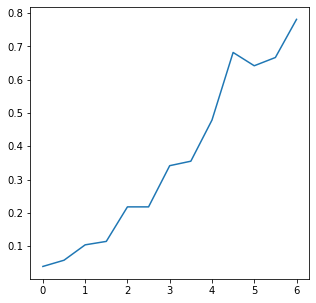

In [37]:
#Visualising the mean of number of HeartDisease for the different numbers of PreExistingConditions 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =5,5
plt.plot((df.groupby(by="PreExistingConditions")["HeartDisease"].mean()).index,(df.groupby(by="PreExistingConditions")["HeartDisease"].mean()).values)

This graph clearly indicates that instances of HeartDisease keeps increasing as the number of PreExistingConditions increases in a person.

### Finding 1

A combination of preexisting conditions like stroke, difficulty in walking, diabetise, Asthma, KidneyDisease or SkinCancer increases the risk of HeartDisease. 

### Age and HeartDisease

In [38]:
#Calculating the number of people in each age category for the Dataset
#AgeCategory 1=18-40, 2=40-60, 3=60-80, 4=80 and up
df.groupby("AgeCategory").count()["HeartDisease"]

AgeCategory
1     21064
2     21006
3     33686
4    244039
Name: HeartDisease, dtype: int64

We see that the bulk of people in the dataset are above 80 years.

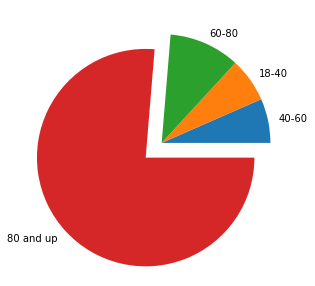

In [39]:
#Visual representation of the number of people in each age category for the Dataset
rcParams['figure.figsize'] =5,5
myexplode=[0,0,0,0.2]
mylabels=["40-60",'18-40','60-80','80 and up']
plt.pie(df.groupby("AgeCategory").count()["HeartDisease"],labels=mylabels,explode=myexplode)
plt.show()

The dataset looks skewed because it consists of mostly old people. 

In [40]:
#Calculating mean of number of HeartDisease for different AgeCategory
df.groupby(by="AgeCategory")["HeartDisease"].mean()

AgeCategory
1    0.006172
2    0.023136
3    0.098765
4    0.096009
Name: HeartDisease, dtype: float64

<BarContainer object of 4 artists>

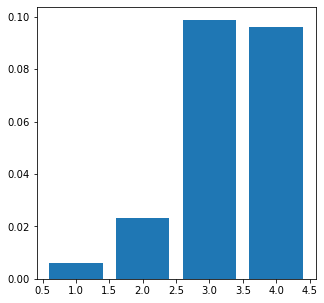

In [41]:
#Plotting the mean of number of HeartDisease for different AgeCategory
#AgeCategory 1=18-40, 2=40-60, 3=60-80, 4=80 and up
rcParams['figure.figsize'] =5,5
plt.bar((df.groupby('AgeCategory')["HeartDisease"].mean()).index,(df.groupby('AgeCategory')["HeartDisease"].mean()).values)

It is interesting to know that the mean of HeartDisease of people above 80 is less than the mean HeartDisease of people in the 60-80 age group. This could be beacause of the low survival rate of people with HeartDisease beyond 80.

### Finding 2

Age plays a very important part in HeartDisease. Older people are more at risk of HeartDisease than younger people

### HeartDisease and Smoking

In [42]:
#Calculating the mean of number of people who smoke and have HeartDisease vs who dont smoke but still have HeartDisease
df.groupby(by="Smoking")["HeartDisease"].mean()

Smoking
0    0.060334
1    0.121577
Name: HeartDisease, dtype: float64

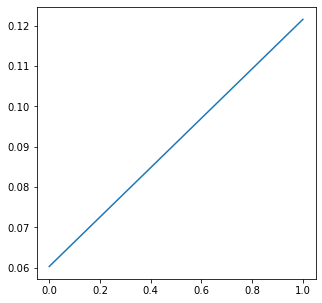

In [43]:
#Visualising the mean of number of people who smoke and have HeartDisease vs who dont smoke but still have HeartDisease
rcParams['figure.figsize'] =5,5
plt.plot((df.groupby( "Smoking")["HeartDisease"].mean()).index,(df.groupby( "Smoking")["HeartDisease"].mean()).values)

### Finding 3

Smoking almost doubles the risk of HeartDisease.

### HeartDisease and SleepTime

array([[<AxesSubplot:title={'center':'SleepTime'}>]], dtype=object)

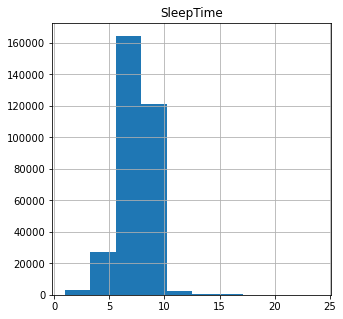

In [56]:
# Plotting on average, how many hours of sleep do you get in a 24-hour period for the whole Dataset
rcParams['figure.figsize'] =5,5
df.hist(column='SleepTime')

In [57]:
df1=df[(df['SleepTime'] > 4) & (df['SleepTime'] <10)]

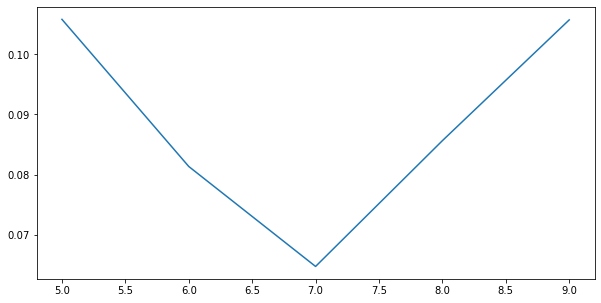

In [58]:
##Calculating mean of number of HeartDisease for different SleepTime
rcParams['figure.figsize'] =10,5
plt.plot((df1.groupby( 'SleepTime')["HeartDisease"].mean()).index,(df1.groupby( 'SleepTime')["HeartDisease"].mean()).values)

If we look at the first graph, we can infer that most of the people in the sample space are between 4 and 10 hours of sleep making the Sleep Time outside the range of 4-10 hours statistically insignificant. Now when we look at the second graph at the line between 4-10 hours of sleep we can say that SleepTime close to 7 looks like the optimal sleeptime to minimise HeartDisease.

### Finding 4
A good nights sleep, around 7 hours is ideal for Heart Health

### Realtionship between BMI and HeartDisease
BMI Buckets\
less than 18.5, Underweight--1\
18.5—24.9, Healthy--2\
25.0—29.9, Overweight--3\
30.0 and Above, Obese--4

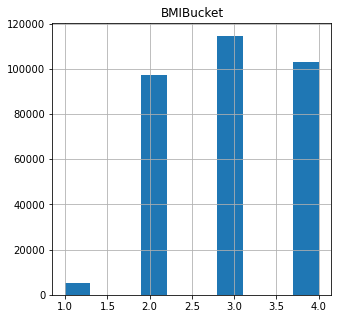

In [59]:
# Checking BMIBucket distribution.
rcParams['figure.figsize'] =5,5
df.hist('BMIBucket')
plt.show()

In [60]:
# Calculating the mean of number of HeartDisease in every BMI bucket
df.groupby("BMIBucket")["HeartDisease"].mean()

BMIBucket
1    0.078474
2    0.064820
3    0.087248
4    0.103771
Name: HeartDisease, dtype: float64

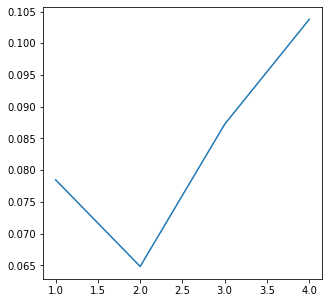

In [61]:
# Visual Representation of the mean of number of HeartDisease in every BMI bucket
rcParams['figure.figsize'] =5,5
plt.plot((df.groupby("BMIBucket")["HeartDisease"].mean()).index,(df.groupby("BMIBucket")["HeartDisease"].mean()).values)

The graph is very interesting. It shows that Heart Disease drops initially as BMI moves from BMIBucket 1 to 2 and 
then rises consistently from buckets 2 to 4 indicating that people with high BMI are more at risk of HeartDisease.
It also shows that underweight people are also at a higher risk of a HeartDisease than people who maintain 
a healthy BMI.

### Finding 5
Maintaining a healthy BMI is ideal for Heart health. Being underweight or overweight can have a negative effect on the heart. Doctors can educate their patients on the benefits os maintaining a healthy BMI

### Race and HeartDisease

In [62]:
df.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'BMIBucket',
       'PreExistingConditions', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White'],
      dtype='object')

In [63]:
#Calculating mean of number of HeartDisease for different race/ethnicity value
df.groupby(by='Race_American Indian/Alaskan Native')["HeartDisease"].mean()


Race_American Indian/Alaskan Native
0    0.085288
1    0.104191
Name: HeartDisease, dtype: float64

In [64]:
df.groupby('Race_Asian')["HeartDisease"].mean()

Race_Asian
0    0.086957
1    0.032970
Name: HeartDisease, dtype: float64

<BarContainer object of 2 artists>

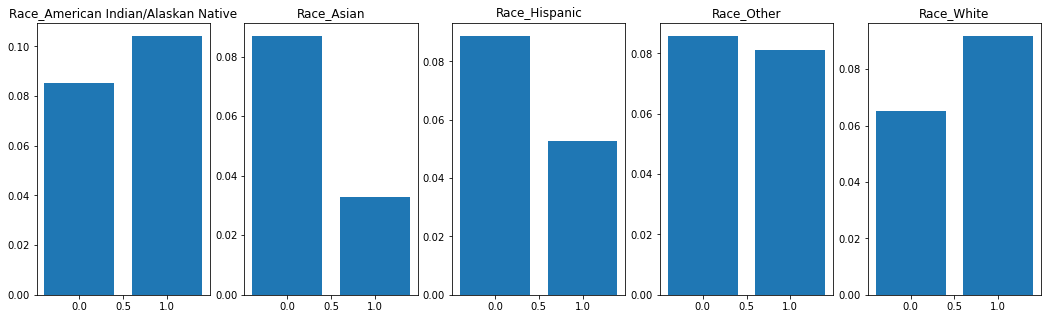

In [65]:
#plotting mean of number of HeartDisease for different race/ethnicity value
rcParams['figure.figsize'] =18,5
plt.subplot(1,5,1)
plt.title("Race_American Indian/Alaskan Native")
plt.bar((df.groupby('Race_American Indian/Alaskan Native')["HeartDisease"].mean()).index,(df.groupby('Race_American Indian/Alaskan Native')["HeartDisease"].mean()).values)

plt.subplot(1,5,2)
plt.title("Race_Asian")
plt.bar((df.groupby('Race_Asian')["HeartDisease"].mean()).index,(df.groupby('Race_Asian')["HeartDisease"].mean()).values)

plt.subplot(1,5,3)
plt.title("Race_Hispanic")
plt.bar((df.groupby('Race_Hispanic')["HeartDisease"].mean()).index,(df.groupby('Race_Hispanic')["HeartDisease"].mean()).values)

plt.subplot(1,5,4)
plt.title("Race_Other")
plt.bar((df.groupby('Race_Other')["HeartDisease"].mean()).index,(df.groupby('Race_Other')["HeartDisease"].mean()).values)

plt.subplot(1,5,5)
plt.title('Race_White')
plt.bar((df.groupby('Race_White')["HeartDisease"].mean()).index,(df.groupby('Race_White')["HeartDisease"].mean()).values)

Race plays a critical part in determining the likelyhood of heart disease. American Indians/Alaskan Natives are at 3 times the risk of having a heart disease than their Asian counterparts.
This could be genetic and lifestyle related.

### Sex and HeartDisease

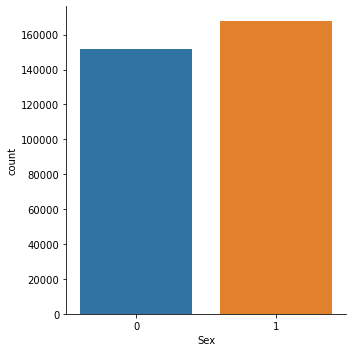

In [66]:
# # Sex Distribution
sns.catplot(x='Sex', data=df, kind='count')
plt.show()

In [67]:
#mean of number of HeartDisease for Men and Women
df.groupby(by="Sex")["HeartDisease"].mean()

Sex
0    0.106185
1    0.066947
Name: HeartDisease, dtype: float64

Men seem to be at a higher risk of HeartDisease

### Relationship between Age,Sex and HeartDisease

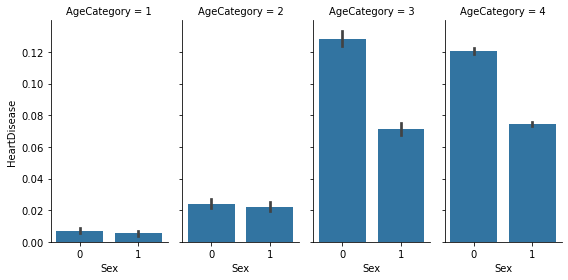

In [68]:
# sex   0 for Male and 1 for Female
g = sns.FacetGrid(df, col="AgeCategory", height=4,col_wrap=4, aspect=.5)
g.map(sns.barplot, "Sex","HeartDisease" , order=[0, 1])

The graphs show that Older Men are more susceptible to Heart Disease than Older Women

### HeartDisease and GenHealth

<BarContainer object of 5 artists>

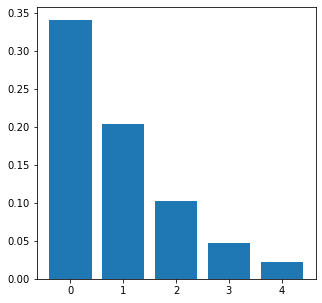

In [69]:
#Calculating mean of number of HeartDisease for deifferent levels of General Health
# 'Excellent'=4,'Very good'=3,  Good'=2,'Fair'=1,  'Poor'=0
rcParams['figure.figsize'] =5,5
plt.bar((df.groupby('GenHealth')["HeartDisease"].mean()).index,(df.groupby('GenHealth')["HeartDisease"].mean()).values)

As your General Health improves, HeartDisease risk decreases

### HeartDisease and PhysicalActivity

<BarContainer object of 2 artists>

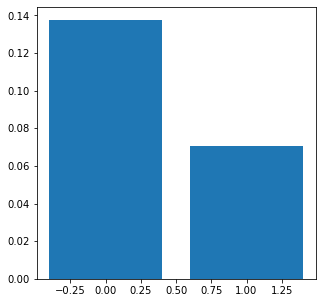

In [70]:
#Calculating mean of number of HeartDisease for Physical Activity yes and no
#Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
rcParams['figure.figsize'] =5,5
plt.bar((df.groupby('PhysicalActivity')["HeartDisease"].mean()).index,(df.groupby('PhysicalActivity')["HeartDisease"]\
                                                                       .mean()).values)

Physical activity decreases the risk of HeartDisease

### HeartDisease and AlcoholDrinking

In [71]:
#Calculating mean of number of HeartDisease for  people who drink Alcohol
df.groupby(by="AlcoholDrinking")["HeartDisease"].mean()

AlcoholDrinking
0    0.088022
1    0.052395
Name: HeartDisease, dtype: float64

<BarContainer object of 2 artists>

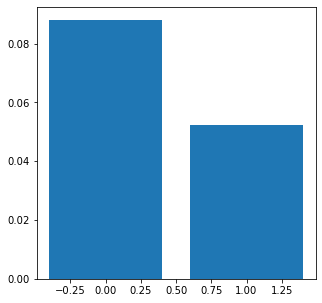

In [73]:
rcParams['figure.figsize'] =5,5
plt.bar((df.groupby( "AlcoholDrinking")["HeartDisease"].mean()).index,(df.groupby( "AlcoholDrinking")["HeartDisease"].mean()).values)

Surprisingly, number of people who drink and have heart disease is less than number of people who dont
drink but still have Heart Disease.

### Finding 1

A combination of preexisting conditions like stroke, difficulty in walking, diabetese, Asthma, KidneyDisease or SkinCancer increases the risk of HeartDisease. 

### Finding 2

Age plays a very important part in HeartDisease. Older people are more at risk of HeartDisease than younger people

### Finding 3

Smoking almost doubles the risk of HeartDisease.

### Finding 4
A good nights sleep, around 7 hours is ideal for Heart Health

### Finding 5
Maintaining a healthy BMI is ideal for Heart health. Being underweight or overweight can have a negative effect on the heart. Doctors can educate their patients on the benefits os maintaining a healthy BMI

### Insight from the findings/Action Plan based on findings:
There are a large number of factors that affect Heart Health. Some are in our control like smoking, maintaining a healthy BMI, getting a good nights rest while there are others that are not under our control like preexisting health issues and age. Patients should be educated about the factors that are under our control to help them manage their Heart Health better.

### Machine Learning  Comparisons
We will use different Machine Learning methods to compare their accuracy.

In [74]:
print(df.keys())

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'BMIBucket',
       'PreExistingConditions', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White'],
      dtype='object')


In [75]:
df.head(2)

,HeartDisease,Smoking,AlcoholDrinking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,BMIBucket,PreExistingConditions,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,1,0,1,4,1,3,5.0,1,3.0,0,0,0,0,0,1
1,0,0,0,1,4,1,3,7.0,2,1.0,0,0,0,0,0,1


### Arrange data into features matrix and target vector

I have created 3 different Feature Matrix X,X1 and X2 to be able to see what variables give me more accurate predictions. 

In [76]:
# creating Feature Matrix #1
X = df.iloc[:, 1:]
X.head()

,Smoking,AlcoholDrinking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,BMIBucket,PreExistingConditions,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,1,0,1,4,1,3,5.0,1,3.0,0,0,0,0,0,1
1,0,0,1,4,1,3,7.0,2,1.0,0,0,0,0,0,1
2,1,0,0,4,1,1,8.0,3,2.0,0,0,0,0,0,1
3,0,0,1,4,0,2,6.0,2,1.0,0,0,0,0,0,1
4,0,0,1,2,1,3,8.0,2,1.0,0,0,0,0,0,1


In [77]:
# creating Feature Matrix #2
X1 = df.loc[:,[ 'BMIBucket','PreExistingConditions','AgeCategory','SleepTime','Smoking']]
X1

,BMIBucket,PreExistingConditions,AgeCategory,SleepTime,Smoking
0,1,3.0,4,5.0,1
1,2,1.0,4,7.0,0
2,3,2.0,4,8.0,1
3,2,1.0,4,6.0,0
4,2,1.0,2,8.0,0
...,...,...,...,...,...
319790,3,3.0,3,6.0,1
319791,3,1.0,4,5.0,1
319792,2,0.0,4,6.0,0
319793,4,0.0,4,12.0,0


In [78]:
# creating Feature Matrix #3
X2 = df.loc[:,[ 'SleepTime', 'BMIBucket', 'PreExistingConditions']]
X2

,SleepTime,BMIBucket,PreExistingConditions
0,5.0,1,3.0
1,7.0,2,1.0
2,8.0,3,2.0
3,6.0,2,1.0
4,8.0,2,1.0
...,...,...,...
319790,6.0,3,3.0
319791,5.0,3,1.0
319792,6.0,2,0.0
319793,12.0,4,0.0


In [79]:
#Creating  Target vector
y = df.iloc[:,0]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64

<b>Analysis through LogisticRegression using feature values X,testing data 20% <b/>

In [80]:
#Choose model: LogisticRegression
from sklearn.linear_model import LogisticRegression
# Set model hyperparameters
model = LogisticRegression(solver='liblinear')
#Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Fit the model 
model.fit(X_train, y_train)
# Predict unknown data
y_test_pred = model.predict(X_test)
#classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58494
           1       0.54      0.08      0.14      5465

    accuracy                           0.92     63959
   macro avg       0.73      0.54      0.55     63959
weighted avg       0.89      0.92      0.89     63959



In [81]:
model.coef_

array([[ 0.36313743, -0.46068739, -0.6678094 ,  0.46717299, -0.04733986,
        -0.53054334,  0.03165494, -0.03786362,  0.5684838 , -0.32302335,
        -0.93305416, -0.51548961, -0.73942738, -0.37634199, -0.17716861]])

In [82]:
X.keys()

Index(['Smoking', 'AlcoholDrinking', 'Sex', 'AgeCategory', 'PhysicalActivity',
       'GenHealth', 'SleepTime', 'BMIBucket', 'PreExistingConditions',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White'],
      dtype='object')

Analysis through LogisticRegression using feature values X,testing data 20% 
Accuracy,the fraction of correct predictions is 0.91 which is not very bad. Here we have used feature columns as all the relevant columns that we identified during data exploration.

<b>Analysis through LogisticRegression using feature values X, testing data 30%<b/>

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87871
           1       0.53      0.08      0.15      8068

    accuracy                           0.92     95939
   macro avg       0.73      0.54      0.55     95939
weighted avg       0.89      0.92      0.89     95939



Analysis through LogisticRegression using feature values X, testing data 30%.
Accuracy,the fraction of correct predictions is 0.92 which is not very bad. Changing the percentage of testing data from 20% to 30% did not make any difference in the prediction accuracy level.

<b>Analysis through LogisticRegression using feature values X1, testing data 20%<b/>

In [84]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)
model.fit(X1_train, y_train)
y_test_pred = model.predict(X1_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58517
           1       0.51      0.04      0.08      5442

    accuracy                           0.92     63959
   macro avg       0.72      0.52      0.52     63959
weighted avg       0.88      0.92      0.88     63959



In [85]:
model.coef_

array([[0.0392222 , 0.78771681, 0.45097662, 0.02352809, 0.57405062]])

In [86]:
X1.keys()

Index(['BMIBucket', 'PreExistingConditions', 'AgeCategory', 'SleepTime',
       'Smoking'],
      dtype='object')

Analysis through LogisticRegression using feature values X1, testing data 20%.


<b>Analysis through LogisticRegression using feature values X2,testing data 20%<b/>

In [87]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)
model.fit(X2_train, y_train)
y_test_pred = model.predict(X2_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58467
           1       0.52      0.05      0.09      5492

    accuracy                           0.91     63959
   macro avg       0.72      0.52      0.52     63959
weighted avg       0.88      0.91      0.88     63959



In [88]:
model.coef_

array([[0.02500889, 0.04395222, 0.84406881]])

In [89]:
X2.keys()

Index(['SleepTime', 'BMIBucket', 'PreExistingConditions'], dtype='object')

Analysis through LogisticRegression using feature values X2, testing data 20%.
Accuracy has actually improved when we used only 3 variables,'SleepTime','BMIBucket' and 'PreExistingConditions' which we have already identified as important variables affecting Heart Disease.

<b>Analysis through KNeighborsClassifier using feature values X  and testing data 30%<b/>

In [90]:
#Choose a class of model
from sklearn.neighbors import KNeighborsClassifier
#Choose model hyperparameters
model = KNeighborsClassifier(n_neighbors=5)
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Fit the model to your data
model.fit(X_train, y_train)
#Predict labels for unknown data
y_test_predict = model.predict(X_test)
# Calculate accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)

0.906972138546368

<b>Analysis through KNeighborsClassifier using feature values X1  and testing data 30%<b/>

In [91]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3)
model.fit(X1_train, y_train)
y_test_predict = model.predict(X1_test)
accuracy_score(y_test, y_test_predict)

0.9056275341623323

Accuracy of predicting correct values through KNeighborsClassifier when we use X1 as feature values is 90.6% which
is not much different from 90.7%

<b>Analysis through DecisionTreeClassifier using feature values X1  and testing data 30%<b/>

In [92]:
#Choose a class of model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#Choose model hyperparameters
model = DecisionTreeClassifier()
#Split data into train and test
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.30)
#Fit the model to your data
dt = model.fit(X1_train, y_train)

[Text(0.4895420298920786, 0.975, 'PreExistingConditions <= 1.75\ngini = 0.157\nsamples = 100.0%\nvalue = [0.914, 0.086]'),
 Text(0.24058164669112408, 0.925, 'PreExistingConditions <= 0.75\ngini = 0.112\nsamples = 87.2%\nvalue = [0.941, 0.059]'),
 Text(0.11233793987747542, 0.875, 'Smoking <= 0.5\ngini = 0.076\nsamples = 60.6%\nvalue = [0.96, 0.04]'),
 Text(0.05679138766206012, 0.825, 'AgeCategory <= 2.5\ngini = 0.056\nsamples = 38.1%\nvalue = [0.971, 0.029]'),
 Text(0.02441230944579, 0.775, 'SleepTime <= 8.5\ngini = 0.012\nsamples = 7.3%\nvalue = [0.994, 0.006]'),
 Text(0.014033338082347913, 0.725, 'AgeCategory <= 1.5\ngini = 0.01\nsamples = 6.7%\nvalue = [0.995, 0.005]'),
 Text(0.008519732155577718, 0.675, 'PreExistingConditions <= 0.25\ngini = 0.007\nsamples = 4.0%\nvalue = [0.996, 0.004]'),
 Text(0.004274113121527283, 0.625, 'BMIBucket <= 1.5\ngini = 0.006\nsamples = 3.9%\nvalue = [0.997, 0.003]'),
 Text(0.0009118107992591537, 0.575, 'SleepTime <= 5.5\ngini = 0.01\nsamples = 0.2%\nva

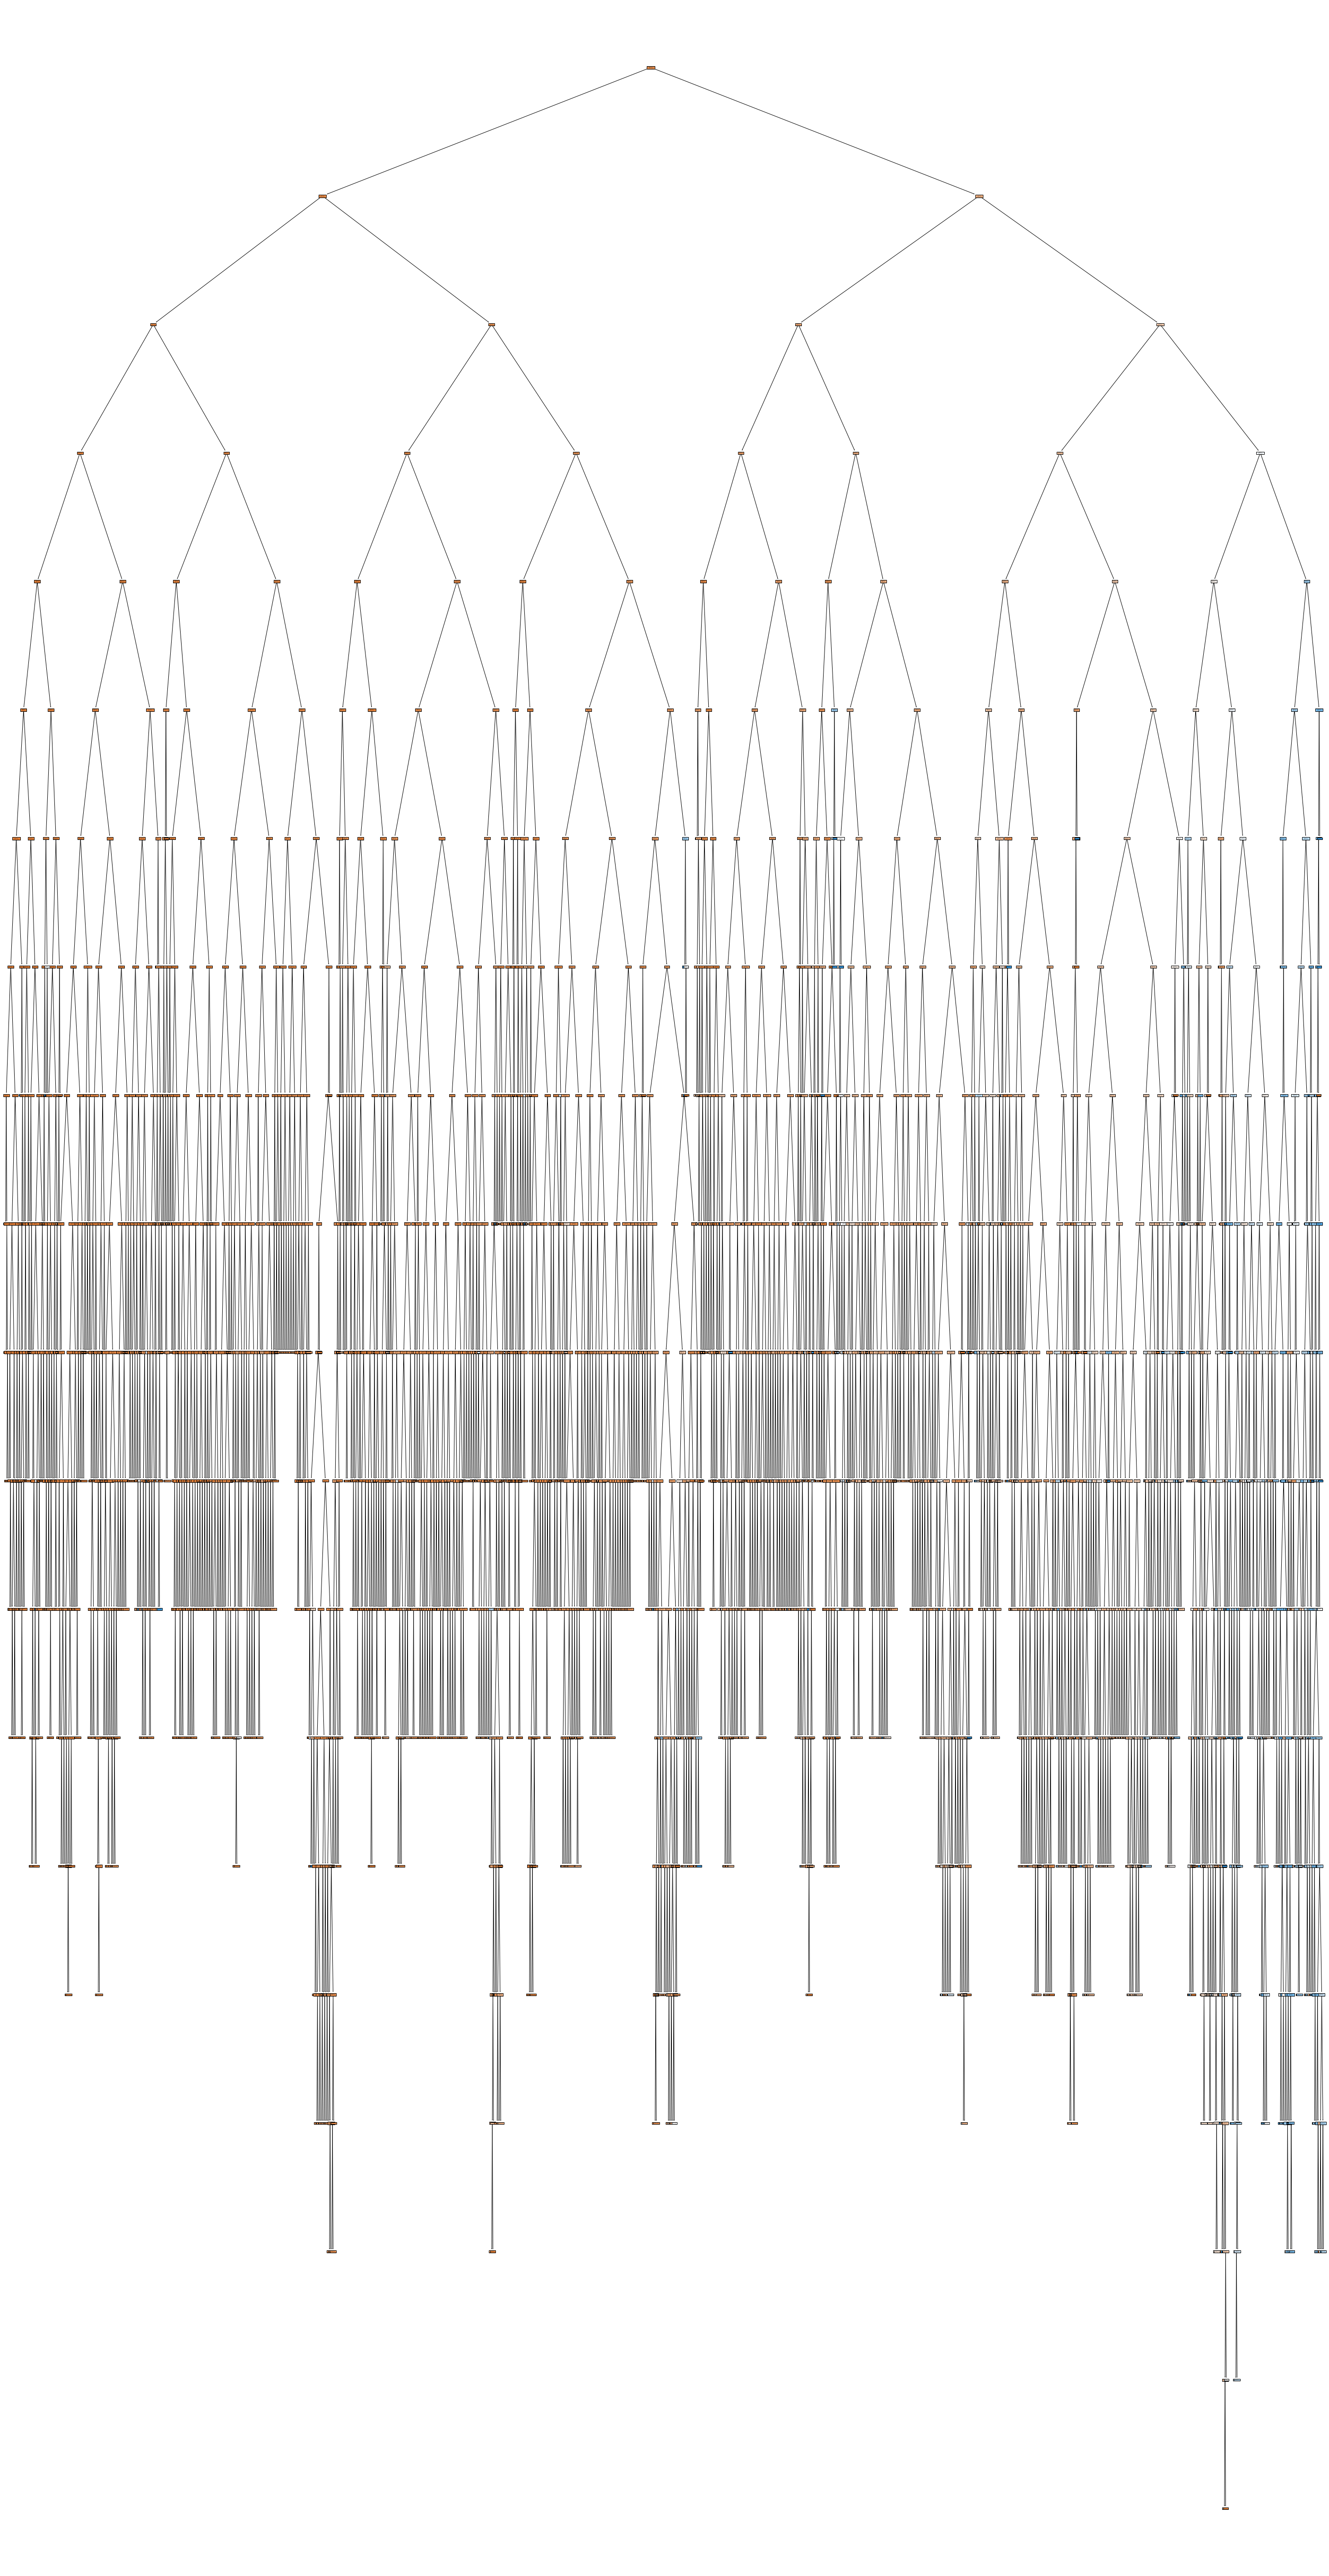

In [93]:
# enlarge figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 50,100
# plot tree
tree.plot_tree(dt,feature_names=X1.keys(),filled=True,precision=3,proportion=True)

In [94]:
# Apply the trained model to predict lable for unknown data
y_test_predict = dt.predict(X1_test)
y_test_predict

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
## Check accuray
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)

0.9150918812995757

Accuracy of prediction with decision Tree is 91.3% which is less than what we got in the Logistic Regression method.
However, the difference is not that much.

#### Finding: Machine Learning
We will conclude our Machine Learning analysis by saying that using fewer more relevant variables like \'SleepTime', 'BMIBucket', 'PreExistingConditions' gives us more accurate results. This tells us that these variables are more important in predicting Heart Health. For our dataset, LogisticRegression has the highest level of accuracy for predicting HeartDisease.